In [1]:
import glob
import pandas as pd
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data_dir = '../data/'

In [4]:
files = glob.glob(data_dir + '*.parquet')

In [5]:
files

['../data/etl_s1_1673664000_1673971200.parquet',
 '../data/etl_s1_1672118400_1672431360.parquet',
 '../data/etl_s1_1673049600_1673356800.parquet',
 '../data/etl_s1_1672742400_1673049600.parquet',
 '../data/etl_s1_1671504000_1671811200.parquet',
 '../data/etl_s1_1671811200_1672118400.parquet',
 '../data/etl_s1_1673356800_1673664000.parquet',
 '../data/etl_s1_1672431360_1672742400.parquet']

In [6]:
data = pd.read_parquet(files[0])

In [7]:
columns = data.columns

In [16]:
data['sequence_time'].min(), data['sequence_time'].max()

('2023-01-14T02:40:00.000000 UTC', '2023-01-17T15:59:59.000000 UTC')

In [ ]:
### Crypto Book Return Correlation

In [8]:
brcols = [col for col in columns if 'book_return' in col and 'avg' not in col and 'sum' not in col and 'max' not in col and 'min' not in col]
brcols

['WBTC-USD:book_return',
 'ADA-USD:book_return',
 'XLM-USD:book_return',
 'DOGE-USD:book_return',
 'CRV-USD:book_return',
 'BTC-USD:book_return',
 'AAVE-USD:book_return',
 'ZEC-USD:book_return',
 'BCH-USD:book_return',
 'EOS-USD:book_return',
 'ETH-USD:book_return',
 'SHIB-USD:book_return',
 'COMP-USD:book_return',
 'BAL-USD:book_return',
 'SUSHI-USD:book_return',
 'LTC-USD:book_return',
 'ETC-USD:book_return',
 'MKR-USD:book_return',
 'ALGO-USD:book_return',
 'UNI-USD:book_return']

In [9]:
book_returns = data[brcols]

In [10]:
book_returns.isna().sum().sum()

0

In [11]:
book_returns = book_returns.fillna(0.)

In [12]:
book_returns.describe()

,WBTC-USD:book_return,ADA-USD:book_return,XLM-USD:book_return,DOGE-USD:book_return,CRV-USD:book_return,BTC-USD:book_return,AAVE-USD:book_return,ZEC-USD:book_return,BCH-USD:book_return,EOS-USD:book_return,ETH-USD:book_return,SHIB-USD:book_return,COMP-USD:book_return,BAL-USD:book_return,SUSHI-USD:book_return,LTC-USD:book_return,ETC-USD:book_return,MKR-USD:book_return,ALGO-USD:book_return,UNI-USD:book_return
count,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05,3.070940e+05
mean,4.260998e-08,-7.070616e-08,7.601670e-09,-2.359741e-07,3.371870e-07,3.158666e-08,5.341597e-07,-2.934968e-07,-1.632622e-07,-1.030485e-07,2.238476e-08,1.031596e-08,8.033766e-07,6.769825e-08,2.419539e-08,-1.180497e-07,-2.169007e-07,2.157121e-08,5.864457e-08,-1.612331e-07
std,2.932643e-04,1.535504e-04,1.463053e-04,1.734608e-04,2.890501e-04,1.035155e-04,2.679241e-04,2.177426e-04,1.600159e-04,1.749200e-04,1.095913e-04,2.230512e-04,4.094801e-04,2.289171e-04,3.227153e-04,1.448998e-04,1.937245e-04,2.091167e-04,1.931417e-04,1.667311e-04
min,-6.633197e-03,-8.844574e-03,-4.930832e-03,-6.270432e-03,-7.072671e-03,-3.045389e-03,-2.168686e-02,-6.903613e-03,-4.395462e-03,-5.532574e-03,-3.675894e-03,-1.071929e-02,-1.790243e-02,-5.216063e-03,-1.259400e-02,-5.348737e-03,-1.229567e-02,-8.690786e-03,-5.366263e-03,-3.812213e-03
25%,-8.277774e-07,-2.369799e-05,-3.692687e-05,-4.161895e-05,-2.970650e-05,-3.441492e-05,-4.958848e-05,-2.560249e-05,-3.436396e-05,0.000000e+00,-3.288724e-05,-5.868514e-06,-5.317683e-05,0.000000e+00,-4.864423e-05,-3.227982e-05,-2.013248e-05,-5.129717e-05,-2.854499e-05,-3.388290e-05
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.928311e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.037497e-07,2.346035e-05,3.504990e-05,4.154455e-05,2.546535e-05,3.452304e-05,4.714228e-05,1.196308e-05,3.422815e-05,0.000000e+00,3.240265e-05,7.020675e-06,5.155235e-05,0.000000e+00,4.783447e-05,3.368741e-05,2.192058e-05,3.912342e-05,2.999853e-05,3.050751e-05
max,5.807766e-03,3.859230e-03,4.840081e-03,5.726498e-03,8.241249e-03,3.679359e-03,3.629906e-02,1.050274e-02,4.242849e-03,5.732352e-03,3.630722e-03,8.040169e-03,2.647333e-02,7.585406e-03,1.119226e-02,5.328552e-03,5.616974e-03,5.572406e-03,8.082873e-03,6.269395e-03


In [13]:
corr = book_returns.corr()

In [14]:
corr

,WBTC-USD:book_return,ADA-USD:book_return,XLM-USD:book_return,DOGE-USD:book_return,CRV-USD:book_return,BTC-USD:book_return,AAVE-USD:book_return,ZEC-USD:book_return,BCH-USD:book_return,EOS-USD:book_return,ETH-USD:book_return,SHIB-USD:book_return,COMP-USD:book_return,BAL-USD:book_return,SUSHI-USD:book_return,LTC-USD:book_return,ETC-USD:book_return,MKR-USD:book_return,ALGO-USD:book_return,UNI-USD:book_return
WBTC-USD:book_return,1.000000,0.074839,0.063321,0.069189,0.042947,0.118896,0.046263,0.053097,0.059630,0.066373,0.084681,0.056605,0.033523,0.047651,0.043313,0.066120,0.057980,0.050339,0.055579,0.059307
ADA-USD:book_return,0.074839,1.000000,0.408491,0.482082,0.355044,0.486866,0.351332,0.393237,0.444056,0.400199,0.489743,0.353960,0.215984,0.196116,0.308008,0.467687,0.417023,0.349707,0.494340,0.440736
XLM-USD:book_return,0.063321,0.408491,1.000000,0.386989,0.299305,0.411125,0.302026,0.345076,0.376447,0.330098,0.409072,0.290298,0.191730,0.182395,0.269135,0.366606,0.330201,0.315856,0.414971,0.383282
DOGE-USD:book_return,0.069189,0.482082,0.386989,1.000000,0.334978,0.485330,0.331972,0.372125,0.420527,0.374032,0.489028,0.383852,0.201573,0.172308,0.290804,0.448591,0.402498,0.340683,0.467536,0.430475
CRV-USD:book_return,0.042947,0.355044,0.299305,0.334978,1.000000,0.347663,0.261183,0.284423,0.320533,0.288822,0.358253,0.248953,0.163403,0.141338,0.232992,0.318897,0.290522,0.265267,0.365167,0.333729
BTC-USD:book_return,0.118896,0.486866,0.411125,0.485330,0.347663,1.000000,0.344884,0.370325,0.445954,0.406673,0.655782,0.319924,0.198678,0.183150,0.300201,0.491930,0.388395,0.339738,0.479783,0.455204
AAVE-USD:book_return,0.046263,0.351332,0.302026,0.331972,0.261183,0.344884,1.000000,0.292858,0.330497,0.280655,0.353075,0.235905,0.176166,0.145623,0.229588,0.323571,0.282756,0.266837,0.369732,0.338431
ZEC-USD:book_return,0.053097,0.393237,0.345076,0.372125,0.284423,0.370325,0.292858,1.000000,0.356410,0.319506,0.375788,0.279683,0.184330,0.173969,0.261076,0.355249,0.316615,0.297801,0.398384,0.365610
BCH-USD:book_return,0.059630,0.444056,0.376447,0.420527,0.320533,0.445954,0.330497,0.356410,1.000000,0.353825,0.447136,0.301997,0.198761,0.175389,0.277389,0.418514,0.374130,0.324818,0.446350,0.407894
EOS-USD:book_return,0.066373,0.400199,0.330098,0.374032,0.288822,0.406673,0.280655,0.319506,0.353825,1.000000,0.404045,0.273730,0.175456,0.167010,0.256567,0.374639,0.339602,0.277659,0.392674,0.356532


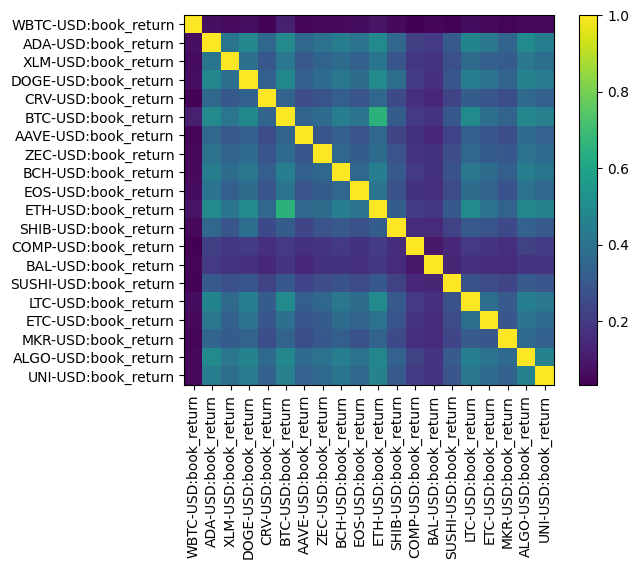

In [15]:
plt.imshow(corr)
plt.yticks(range(len(book_returns.columns)), book_returns.columns)
plt.xticks(range(len(book_returns.columns)), book_returns.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

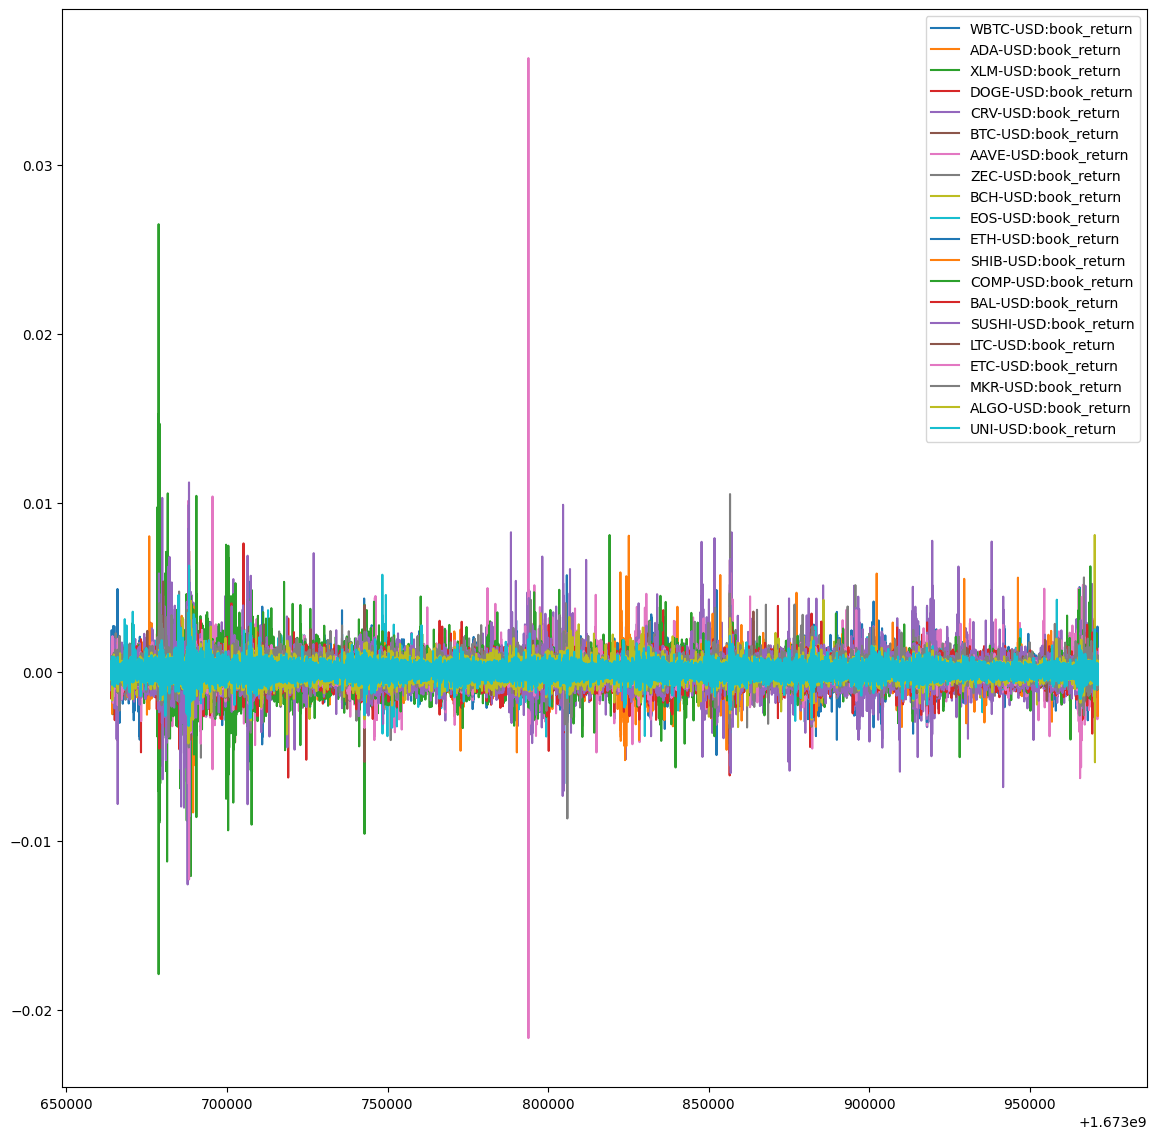

In [16]:
f,ax=plt.subplots(figsize=(14,14))
book_returns.plot(ax=ax)

In [17]:
# time lagged cross correlation

In [18]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [19]:
def create_pairs(data):
    pairs = []
    columns = data.columns
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                col1_name = col1.split(':')[0]
                col2_name = col2.split(':')[0]
                pairs.append((col1_name+':'+col2_name, col1, col2))
    return pairs

In [20]:
all_pairs = create_pairs(book_returns)

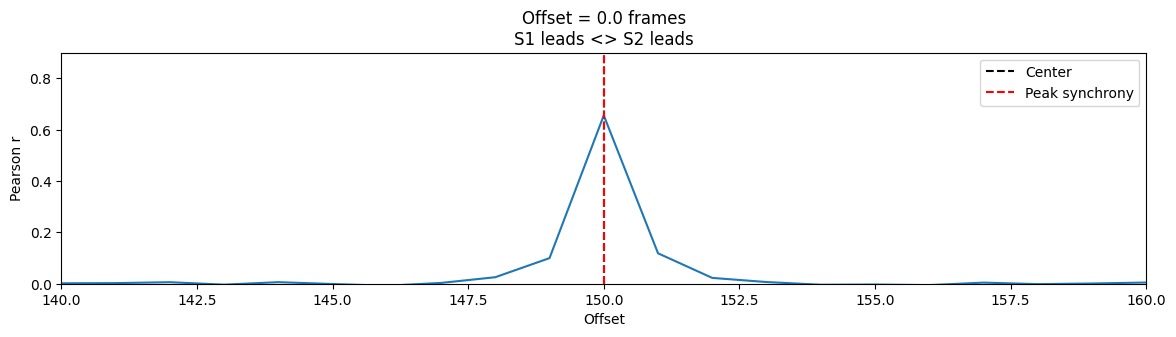

In [25]:
seconds=5
fps=30
rs = [crosscorr(book_returns['BTC-USD:book_return'], book_returns['ETH-USD:book_return'], lag) for lag in range(-int(seconds*fps),int(seconds*fps))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.0,.9],xlim=[140, 160], xlabel='Offset',ylabel='Pearson r')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
#ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

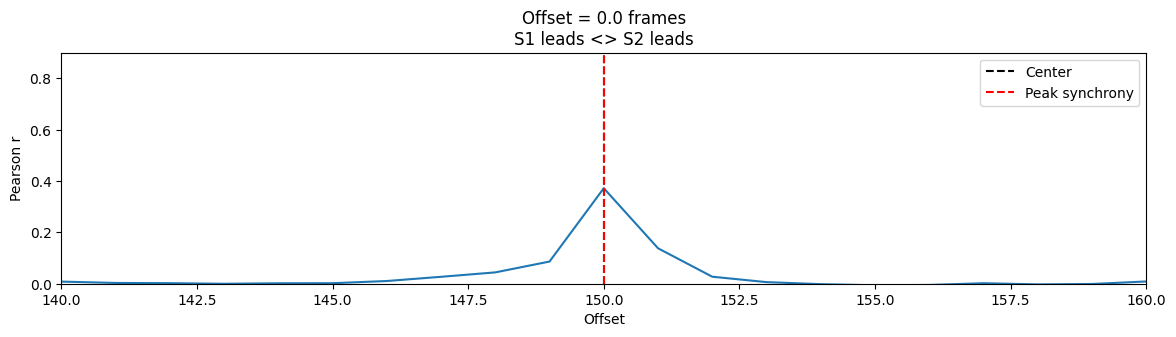

In [26]:
seconds=5
fps=30
rs = [crosscorr(book_returns['ZEC-USD:book_return'], book_returns['DOGE-USD:book_return'], lag) for lag in range(-int(seconds*fps),int(seconds*fps))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.0,.9],xlim=[140, 160], xlabel='Offset',ylabel='Pearson r')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
#ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [28]:
brcols960 = [col for col in columns if 'book_return_960sum' in col]
brcols960

['WBTC-USD:book_return_960sum',
 'ADA-USD:book_return_960sum',
 'XLM-USD:book_return_960sum',
 'DOGE-USD:book_return_960sum',
 'CRV-USD:book_return_960sum',
 'BTC-USD:book_return_960sum',
 'AAVE-USD:book_return_960sum',
 'ZEC-USD:book_return_960sum',
 'BCH-USD:book_return_960sum',
 'EOS-USD:book_return_960sum',
 'ETH-USD:book_return_960sum',
 'SHIB-USD:book_return_960sum',
 'COMP-USD:book_return_960sum',
 'BAL-USD:book_return_960sum',
 'SUSHI-USD:book_return_960sum',
 'LTC-USD:book_return_960sum',
 'ETC-USD:book_return_960sum',
 'MKR-USD:book_return_960sum',
 'ALGO-USD:book_return_960sum',
 'UNI-USD:book_return_960sum']

In [29]:
book_returns = data[brcols960]

In [30]:
book_returns.isna().sum().sum()

0

In [31]:
corr = book_returns.corr()
corr

,WBTC-USD:book_return_960sum,ADA-USD:book_return_960sum,XLM-USD:book_return_960sum,DOGE-USD:book_return_960sum,CRV-USD:book_return_960sum,BTC-USD:book_return_960sum,AAVE-USD:book_return_960sum,ZEC-USD:book_return_960sum,BCH-USD:book_return_960sum,EOS-USD:book_return_960sum,ETH-USD:book_return_960sum,SHIB-USD:book_return_960sum,COMP-USD:book_return_960sum,BAL-USD:book_return_960sum,SUSHI-USD:book_return_960sum,LTC-USD:book_return_960sum,ETC-USD:book_return_960sum,MKR-USD:book_return_960sum,ALGO-USD:book_return_960sum,UNI-USD:book_return_960sum
WBTC-USD:book_return_960sum,1.000000,0.778178,0.732215,0.792560,0.574037,0.980289,0.511233,0.762365,0.740619,0.734901,0.892223,0.658825,0.299311,0.727531,0.619382,0.685406,0.775880,0.727879,0.690297,0.735971
ADA-USD:book_return_960sum,0.778178,1.000000,0.852979,0.886711,0.636814,0.794067,0.620287,0.868531,0.870143,0.825991,0.783415,0.748435,0.386904,0.801362,0.756430,0.765852,0.865184,0.821159,0.844660,0.816872
XLM-USD:book_return_960sum,0.732215,0.852979,1.000000,0.842910,0.623550,0.748027,0.559798,0.839714,0.824357,0.805278,0.727965,0.717171,0.342466,0.777981,0.709101,0.736332,0.822775,0.788786,0.833530,0.784633
DOGE-USD:book_return_960sum,0.792560,0.886711,0.842910,1.000000,0.656815,0.810113,0.595125,0.863599,0.862933,0.822062,0.828828,0.820727,0.359910,0.808702,0.740084,0.793670,0.882676,0.807714,0.838066,0.816745
CRV-USD:book_return_960sum,0.574037,0.636814,0.623550,0.656815,1.000000,0.583284,0.534043,0.647039,0.615387,0.589052,0.591652,0.552927,0.261675,0.618717,0.589950,0.537499,0.639025,0.640539,0.606805,0.620707
BTC-USD:book_return_960sum,0.980289,0.794067,0.748027,0.810113,0.583284,1.000000,0.520676,0.776632,0.756481,0.748114,0.907109,0.673440,0.302914,0.739939,0.632093,0.702004,0.791246,0.741627,0.705608,0.749742
AAVE-USD:book_return_960sum,0.511233,0.620287,0.559798,0.595125,0.534043,0.520676,1.000000,0.604735,0.602042,0.590655,0.563304,0.496763,0.434613,0.572251,0.558370,0.539736,0.599868,0.624955,0.593675,0.618680
ZEC-USD:book_return_960sum,0.762365,0.868531,0.839714,0.863599,0.647039,0.776632,0.604735,1.000000,0.862091,0.819315,0.777617,0.731805,0.418956,0.820649,0.754607,0.780845,0.856406,0.833276,0.828885,0.815189
BCH-USD:book_return_960sum,0.740619,0.870143,0.824357,0.862933,0.615387,0.756481,0.602042,0.862091,1.000000,0.826428,0.758786,0.716881,0.392440,0.795936,0.716605,0.764397,0.858046,0.792076,0.820529,0.801954
EOS-USD:book_return_960sum,0.734901,0.825991,0.805278,0.822062,0.589052,0.748114,0.590655,0.819315,0.826428,1.000000,0.746831,0.677631,0.324932,0.757061,0.693082,0.725174,0.813460,0.762466,0.795108,0.773033


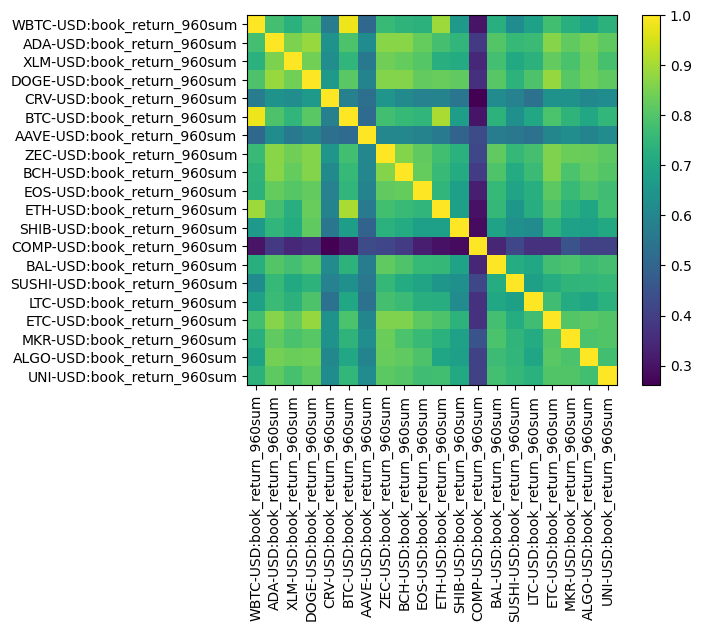

In [32]:
plt.imshow(corr)
plt.yticks(range(len(book_returns.columns)), book_returns.columns)
plt.xticks(range(len(book_returns.columns)), book_returns.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

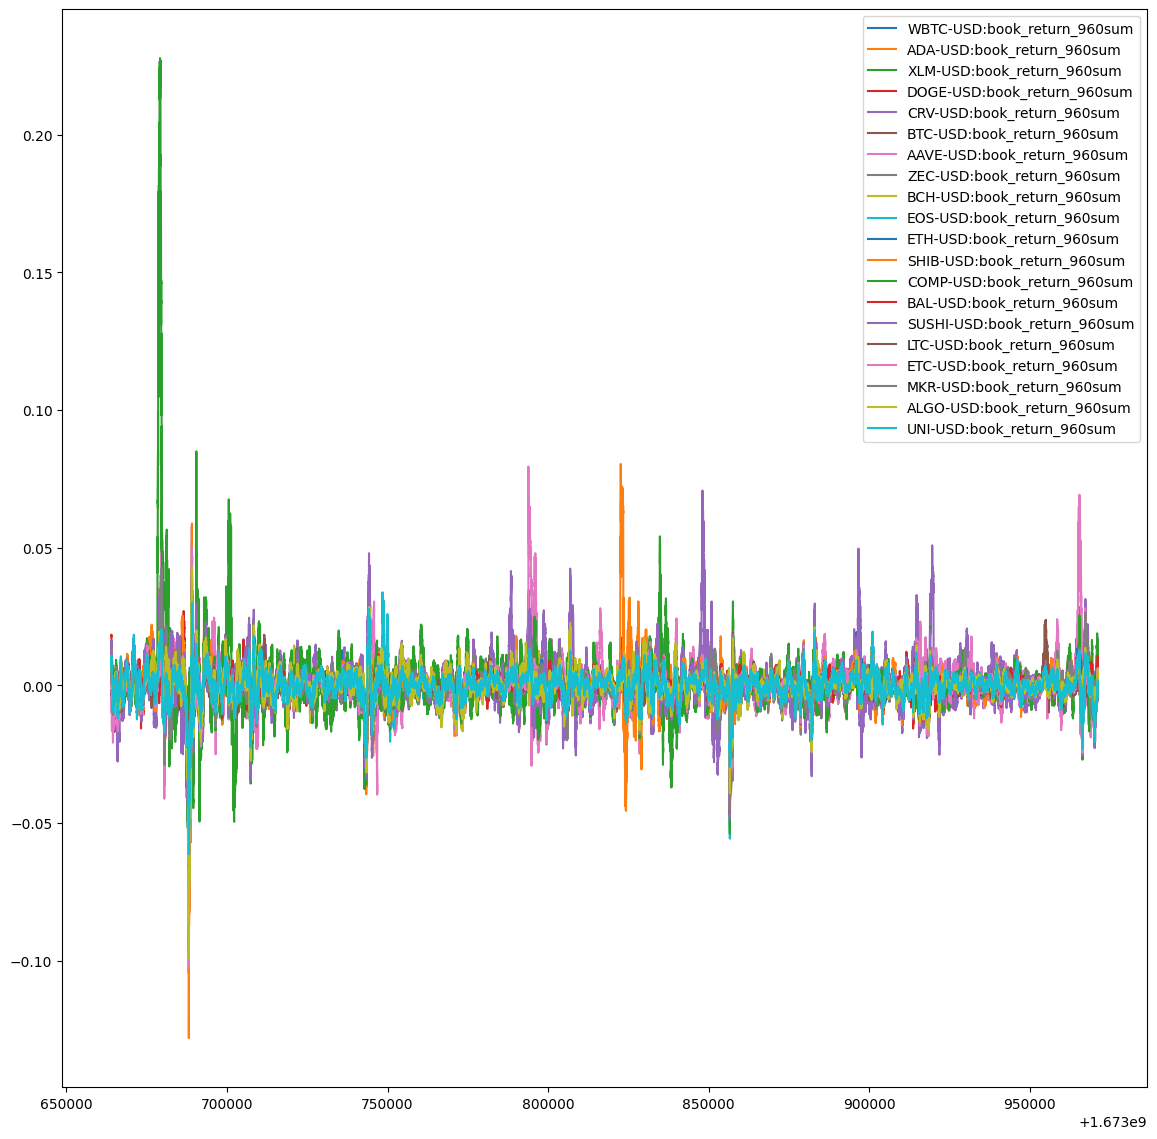

In [33]:
f,ax=plt.subplots(figsize=(14,14))
book_returns.plot(ax=ax)

In [34]:
brcols1920 = [col for col in columns if 'book_return_1920sum' in col]
brcols1920

['WBTC-USD:book_return_1920sum',
 'ADA-USD:book_return_1920sum',
 'XLM-USD:book_return_1920sum',
 'DOGE-USD:book_return_1920sum',
 'CRV-USD:book_return_1920sum',
 'BTC-USD:book_return_1920sum',
 'AAVE-USD:book_return_1920sum',
 'ZEC-USD:book_return_1920sum',
 'BCH-USD:book_return_1920sum',
 'EOS-USD:book_return_1920sum',
 'ETH-USD:book_return_1920sum',
 'SHIB-USD:book_return_1920sum',
 'COMP-USD:book_return_1920sum',
 'BAL-USD:book_return_1920sum',
 'SUSHI-USD:book_return_1920sum',
 'LTC-USD:book_return_1920sum',
 'ETC-USD:book_return_1920sum',
 'MKR-USD:book_return_1920sum',
 'ALGO-USD:book_return_1920sum',
 'UNI-USD:book_return_1920sum']

In [35]:
book_returns = data[brcols1920]

In [36]:
book_returns.isna().sum().sum()

0

In [37]:
corr = book_returns.corr()
corr

,WBTC-USD:book_return_1920sum,ADA-USD:book_return_1920sum,XLM-USD:book_return_1920sum,DOGE-USD:book_return_1920sum,CRV-USD:book_return_1920sum,BTC-USD:book_return_1920sum,AAVE-USD:book_return_1920sum,ZEC-USD:book_return_1920sum,BCH-USD:book_return_1920sum,EOS-USD:book_return_1920sum,ETH-USD:book_return_1920sum,SHIB-USD:book_return_1920sum,COMP-USD:book_return_1920sum,BAL-USD:book_return_1920sum,SUSHI-USD:book_return_1920sum,LTC-USD:book_return_1920sum,ETC-USD:book_return_1920sum,MKR-USD:book_return_1920sum,ALGO-USD:book_return_1920sum,UNI-USD:book_return_1920sum
WBTC-USD:book_return_1920sum,1.000000,0.780881,0.741259,0.805830,0.524879,0.987716,0.495497,0.760840,0.752344,0.720970,0.898553,0.707496,0.314646,0.727953,0.619153,0.686142,0.773427,0.724580,0.689022,0.730950
ADA-USD:book_return_1920sum,0.780881,1.000000,0.878655,0.892016,0.591924,0.791816,0.618535,0.869300,0.885691,0.815325,0.794635,0.789052,0.396743,0.807450,0.774917,0.769534,0.859792,0.819695,0.854850,0.822828
XLM-USD:book_return_1920sum,0.741259,0.878655,1.000000,0.860883,0.595447,0.752429,0.551841,0.841273,0.846238,0.802880,0.743336,0.777003,0.363538,0.781458,0.730732,0.764242,0.821201,0.798666,0.851800,0.799924
DOGE-USD:book_return_1920sum,0.805830,0.892016,0.860883,1.000000,0.612465,0.818281,0.558052,0.855762,0.859270,0.797394,0.841691,0.854858,0.354084,0.794014,0.752076,0.787706,0.897006,0.798854,0.851473,0.819709
CRV-USD:book_return_1920sum,0.524879,0.591924,0.595447,0.612465,1.000000,0.526979,0.489558,0.618387,0.584257,0.537322,0.534306,0.552203,0.245899,0.588859,0.590504,0.508221,0.619876,0.602493,0.582549,0.587782
BTC-USD:book_return_1920sum,0.987716,0.791816,0.752429,0.818281,0.526979,1.000000,0.499062,0.768456,0.761573,0.726627,0.906829,0.716784,0.314069,0.734364,0.626066,0.698251,0.781751,0.732726,0.697790,0.739187
AAVE-USD:book_return_1920sum,0.495497,0.618535,0.551841,0.558052,0.489558,0.499062,1.000000,0.584490,0.587390,0.574067,0.546779,0.488636,0.446100,0.547605,0.559352,0.525902,0.564288,0.605601,0.577040,0.584835
ZEC-USD:book_return_1920sum,0.760840,0.869300,0.841273,0.855762,0.618387,0.768456,0.584490,1.000000,0.866628,0.803098,0.783673,0.755240,0.421160,0.826174,0.781617,0.784307,0.854486,0.829960,0.821930,0.818827
BCH-USD:book_return_1920sum,0.752344,0.885691,0.846238,0.859270,0.584257,0.761573,0.587390,0.866628,1.000000,0.822962,0.777654,0.767290,0.388429,0.793861,0.736357,0.772212,0.864731,0.783045,0.823823,0.817153
EOS-USD:book_return_1920sum,0.720970,0.815325,0.802880,0.797394,0.537322,0.726627,0.574067,0.803098,0.822962,1.000000,0.735537,0.692123,0.319070,0.722485,0.678697,0.697590,0.794268,0.732794,0.783840,0.766113


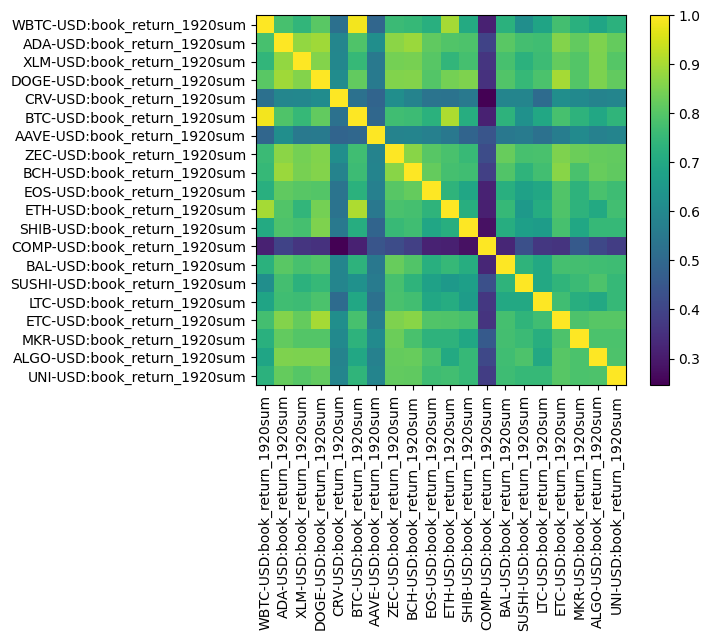

In [38]:
plt.imshow(corr)
plt.yticks(range(len(book_returns.columns)), book_returns.columns)
plt.xticks(range(len(book_returns.columns)), book_returns.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

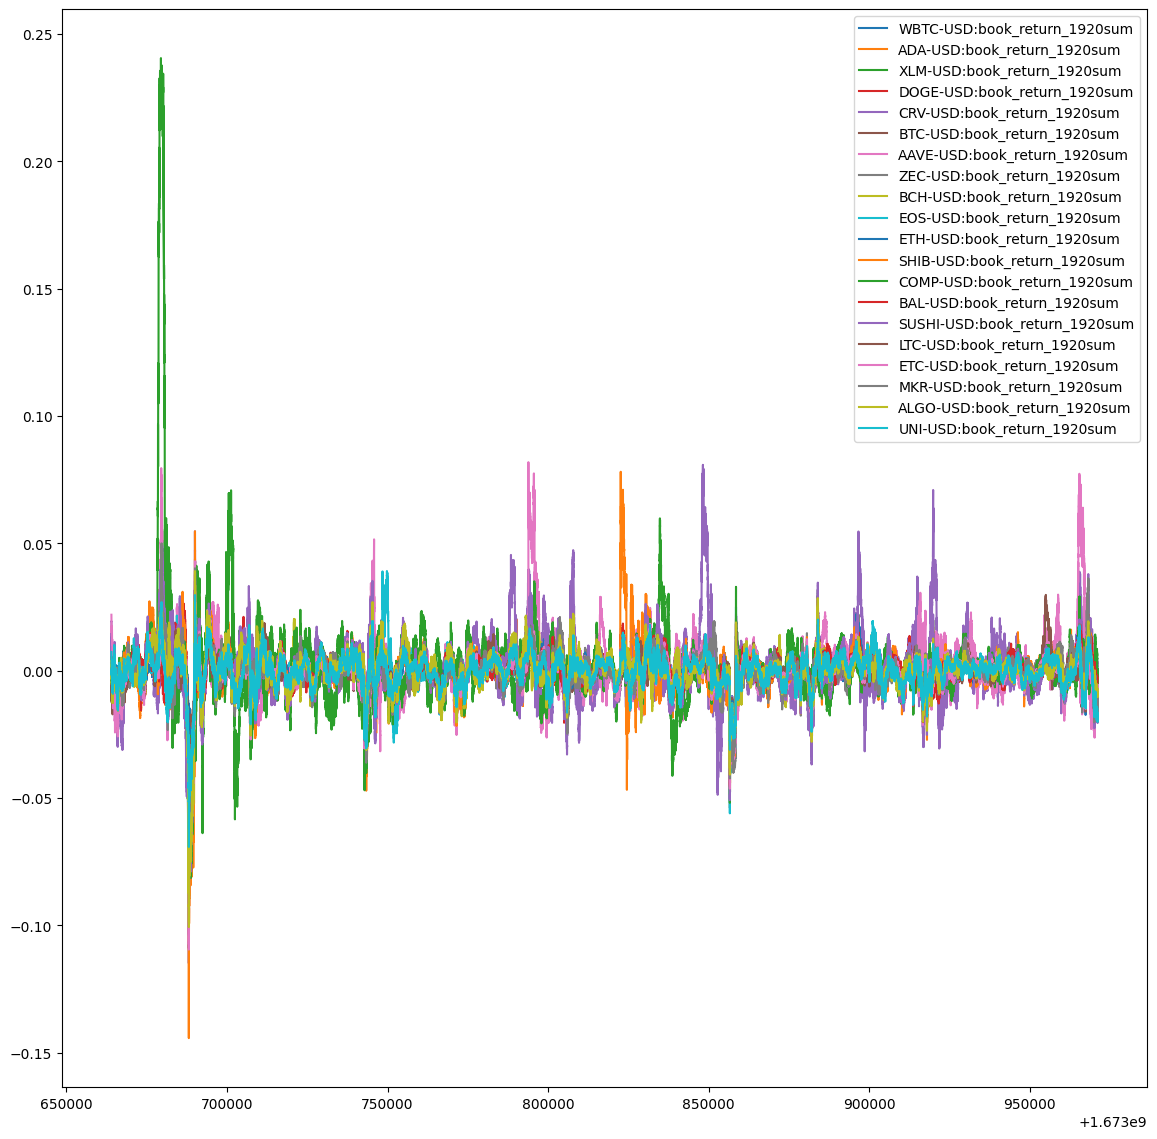

In [39]:
f,ax=plt.subplots(figsize=(14,14))
book_returns.plot(ax=ax)

In [8]:
brcols324 = [col for col in columns if 'book_return_324sum' in col]
brcols324

['WBTC-USD:book_return_324sum',
 'ADA-USD:book_return_324sum',
 'XLM-USD:book_return_324sum',
 'DOGE-USD:book_return_324sum',
 'CRV-USD:book_return_324sum',
 'BTC-USD:book_return_324sum',
 'AAVE-USD:book_return_324sum',
 'ZEC-USD:book_return_324sum',
 'BCH-USD:book_return_324sum',
 'EOS-USD:book_return_324sum',
 'ETH-USD:book_return_324sum',
 'SHIB-USD:book_return_324sum',
 'COMP-USD:book_return_324sum',
 'BAL-USD:book_return_324sum',
 'SUSHI-USD:book_return_324sum',
 'LTC-USD:book_return_324sum',
 'ETC-USD:book_return_324sum',
 'MKR-USD:book_return_324sum',
 'ALGO-USD:book_return_324sum',
 'UNI-USD:book_return_324sum']

In [9]:
book_returns = data[brcols324]

In [10]:
book_returns.isna().sum().sum()

0

In [11]:
corr = book_returns.corr()
corr

,WBTC-USD:book_return_324sum,ADA-USD:book_return_324sum,XLM-USD:book_return_324sum,DOGE-USD:book_return_324sum,CRV-USD:book_return_324sum,BTC-USD:book_return_324sum,AAVE-USD:book_return_324sum,ZEC-USD:book_return_324sum,BCH-USD:book_return_324sum,EOS-USD:book_return_324sum,ETH-USD:book_return_324sum,SHIB-USD:book_return_324sum,COMP-USD:book_return_324sum,BAL-USD:book_return_324sum,SUSHI-USD:book_return_324sum,LTC-USD:book_return_324sum,ETC-USD:book_return_324sum,MKR-USD:book_return_324sum,ALGO-USD:book_return_324sum,UNI-USD:book_return_324sum
WBTC-USD:book_return_324sum,1.000000,0.754194,0.714642,0.764979,0.551231,0.953658,0.482367,0.733875,0.693625,0.712594,0.853004,0.629553,0.319396,0.696589,0.607791,0.672217,0.748886,0.694265,0.694389,0.701514
ADA-USD:book_return_324sum,0.754194,1.000000,0.826691,0.872055,0.618579,0.791285,0.600743,0.843748,0.831229,0.812814,0.781215,0.726657,0.387037,0.787327,0.715351,0.749047,0.846850,0.800751,0.832438,0.802933
XLM-USD:book_return_324sum,0.714642,0.826691,1.000000,0.823724,0.595671,0.748684,0.563148,0.820641,0.782664,0.780970,0.731017,0.691891,0.366914,0.764276,0.685297,0.712019,0.794163,0.772376,0.809595,0.773627
DOGE-USD:book_return_324sum,0.764979,0.872055,0.823724,1.000000,0.624578,0.805129,0.591720,0.844113,0.825482,0.817371,0.820045,0.798005,0.374335,0.797995,0.719298,0.773461,0.857433,0.797007,0.825128,0.800438
CRV-USD:book_return_324sum,0.551231,0.618579,0.595671,0.624578,1.000000,0.573711,0.495560,0.620774,0.584617,0.583301,0.586462,0.515367,0.282924,0.594066,0.550769,0.516498,0.612109,0.617630,0.600341,0.603811
BTC-USD:book_return_324sum,0.953658,0.791285,0.748684,0.805129,0.573711,1.000000,0.507035,0.768925,0.732235,0.746291,0.893142,0.659492,0.334096,0.725632,0.634300,0.707267,0.781360,0.724567,0.729597,0.737231
AAVE-USD:book_return_324sum,0.482367,0.600743,0.563148,0.591720,0.495560,0.507035,1.000000,0.612146,0.577149,0.579070,0.543683,0.493952,0.376249,0.583582,0.553899,0.520016,0.582129,0.626305,0.594346,0.614038
ZEC-USD:book_return_324sum,0.733875,0.843748,0.820641,0.844113,0.620774,0.768925,0.612146,1.000000,0.828675,0.813031,0.769502,0.703317,0.431385,0.790480,0.729741,0.757359,0.830165,0.810548,0.816988,0.790422
BCH-USD:book_return_324sum,0.693625,0.831229,0.782664,0.825482,0.584617,0.732235,0.577149,0.828675,1.000000,0.804644,0.730795,0.681785,0.395116,0.759253,0.685135,0.733980,0.818890,0.762657,0.790465,0.762682
EOS-USD:book_return_324sum,0.712594,0.812814,0.780970,0.817371,0.583301,0.746291,0.579070,0.813031,0.804644,1.000000,0.750418,0.671851,0.370049,0.759755,0.692016,0.728157,0.801875,0.766421,0.784922,0.749033


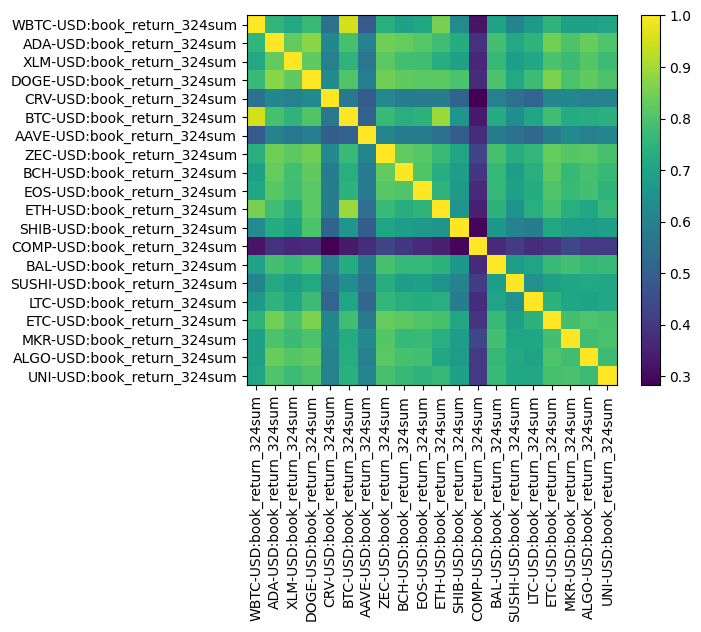

In [12]:
plt.imshow(corr)
plt.yticks(range(len(book_returns.columns)), book_returns.columns)
plt.xticks(range(len(book_returns.columns)), book_returns.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

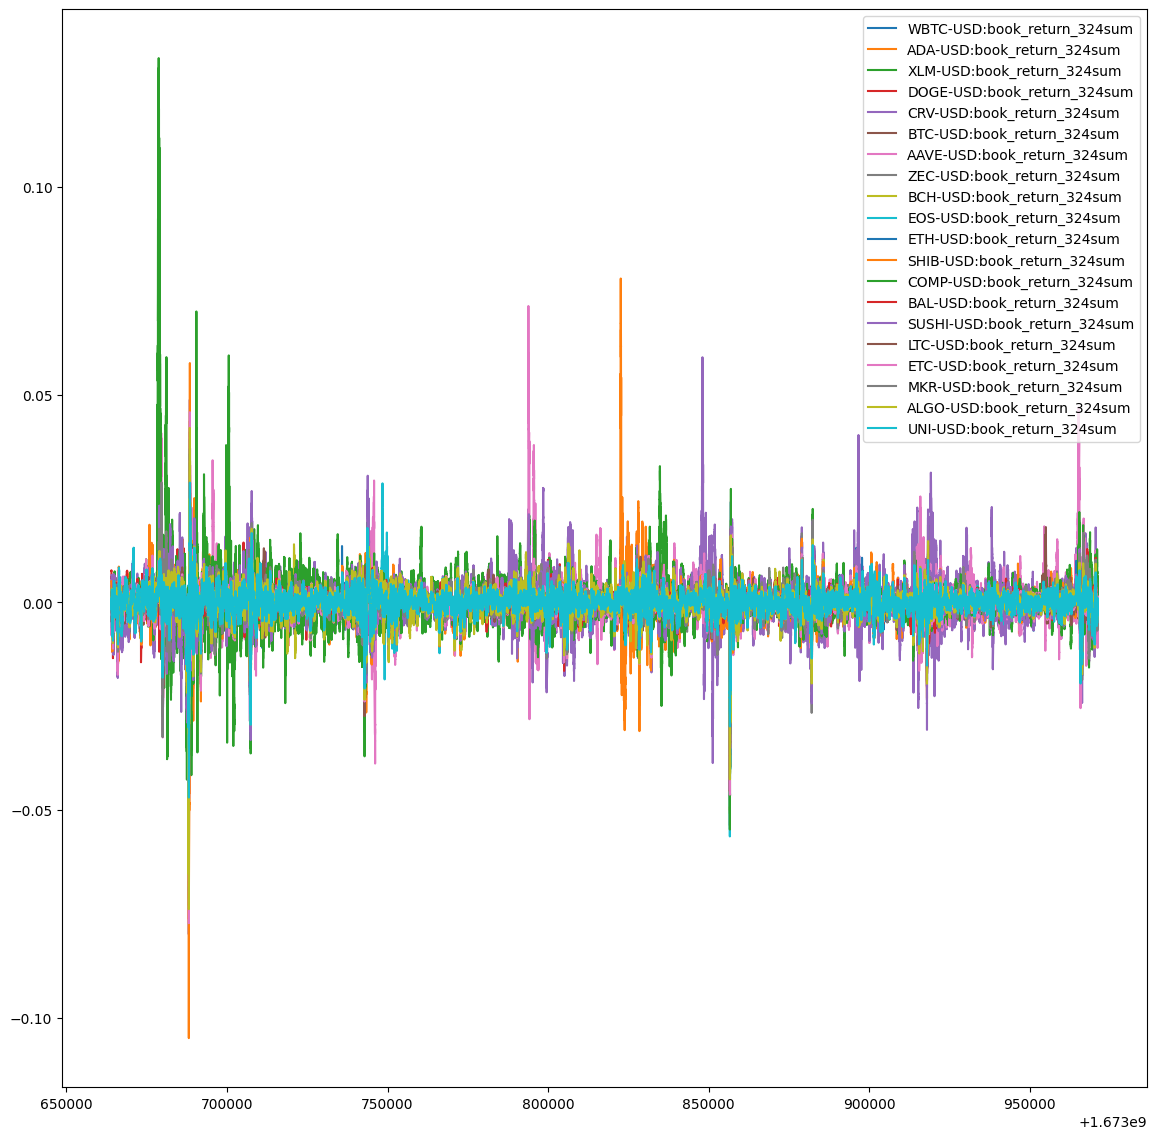

In [13]:
f,ax=plt.subplots(figsize=(14,14))
book_returns.plot(ax=ax)

In [17]:
brcols27 = [col for col in columns if 'book_return_27sum' in col]
brcols27

['WBTC-USD:book_return_27sum',
 'ADA-USD:book_return_27sum',
 'XLM-USD:book_return_27sum',
 'DOGE-USD:book_return_27sum',
 'CRV-USD:book_return_27sum',
 'BTC-USD:book_return_27sum',
 'AAVE-USD:book_return_27sum',
 'ZEC-USD:book_return_27sum',
 'BCH-USD:book_return_27sum',
 'EOS-USD:book_return_27sum',
 'ETH-USD:book_return_27sum',
 'SHIB-USD:book_return_27sum',
 'COMP-USD:book_return_27sum',
 'BAL-USD:book_return_27sum',
 'SUSHI-USD:book_return_27sum',
 'LTC-USD:book_return_27sum',
 'ETC-USD:book_return_27sum',
 'MKR-USD:book_return_27sum',
 'ALGO-USD:book_return_27sum',
 'UNI-USD:book_return_27sum']

In [18]:
book_returns = data[brcols27]

In [19]:
book_returns.isna().sum().sum()

0

In [20]:
corr = book_returns.corr()
corr

,WBTC-USD:book_return_27sum,ADA-USD:book_return_27sum,XLM-USD:book_return_27sum,DOGE-USD:book_return_27sum,CRV-USD:book_return_27sum,BTC-USD:book_return_27sum,AAVE-USD:book_return_27sum,ZEC-USD:book_return_27sum,BCH-USD:book_return_27sum,EOS-USD:book_return_27sum,ETH-USD:book_return_27sum,SHIB-USD:book_return_27sum,COMP-USD:book_return_27sum,BAL-USD:book_return_27sum,SUSHI-USD:book_return_27sum,LTC-USD:book_return_27sum,ETC-USD:book_return_27sum,MKR-USD:book_return_27sum,ALGO-USD:book_return_27sum,UNI-USD:book_return_27sum
WBTC-USD:book_return_27sum,1.000000,0.505876,0.475563,0.526336,0.395871,0.703687,0.352734,0.476439,0.465874,0.479892,0.610884,0.413815,0.285220,0.424649,0.421047,0.495753,0.503755,0.478199,0.495626,0.486655
ADA-USD:book_return_27sum,0.505876,1.000000,0.728902,0.794117,0.617705,0.719444,0.566342,0.750625,0.738870,0.728090,0.731657,0.644383,0.452055,0.633222,0.655201,0.729309,0.763461,0.723247,0.774409,0.731305
XLM-USD:book_return_27sum,0.475563,0.728902,1.000000,0.733105,0.567932,0.678081,0.526067,0.706437,0.682658,0.678427,0.678119,0.596343,0.431011,0.604138,0.619070,0.666814,0.703644,0.686849,0.728709,0.700276
DOGE-USD:book_return_27sum,0.526336,0.794117,0.733105,1.000000,0.602526,0.742411,0.567882,0.756794,0.737587,0.733566,0.764433,0.749074,0.450644,0.637840,0.666227,0.744247,0.798595,0.748368,0.778004,0.748540
CRV-USD:book_return_27sum,0.395871,0.617705,0.567932,0.602526,1.000000,0.566071,0.461175,0.592117,0.571906,0.575309,0.585235,0.493691,0.364345,0.500248,0.526930,0.558587,0.591478,0.581499,0.617313,0.584753
BTC-USD:book_return_27sum,0.703687,0.719444,0.678081,0.742411,0.566071,1.000000,0.498164,0.675031,0.666888,0.671747,0.868818,0.569439,0.407049,0.578004,0.602628,0.710192,0.696053,0.665746,0.707746,0.692737
AAVE-USD:book_return_27sum,0.352734,0.566342,0.526067,0.567882,0.461175,0.498164,1.000000,0.573718,0.550737,0.547056,0.527801,0.453597,0.374730,0.478914,0.508739,0.519079,0.548887,0.556388,0.580452,0.566871
ZEC-USD:book_return_27sum,0.476439,0.750625,0.706437,0.756794,0.592117,0.675031,0.573718,1.000000,0.732138,0.732568,0.697747,0.609284,0.462046,0.623607,0.645781,0.701263,0.732998,0.721217,0.762278,0.718190
BCH-USD:book_return_27sum,0.465874,0.738870,0.682658,0.737587,0.571906,0.666888,0.550737,0.732138,1.000000,0.722578,0.692783,0.585830,0.442268,0.607580,0.620297,0.698661,0.724299,0.684663,0.734773,0.684500
EOS-USD:book_return_27sum,0.479892,0.728090,0.678427,0.733566,0.575309,0.671747,0.547056,0.732568,0.722578,1.000000,0.695535,0.581926,0.449081,0.619574,0.625580,0.695095,0.721451,0.689321,0.739218,0.689925


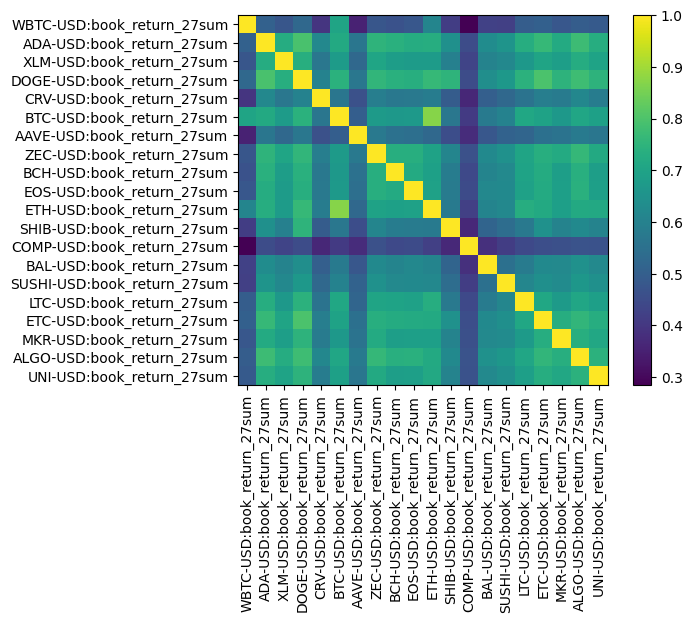

In [21]:
plt.imshow(corr)
plt.yticks(range(len(book_returns.columns)), book_returns.columns)
plt.xticks(range(len(book_returns.columns)), book_returns.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

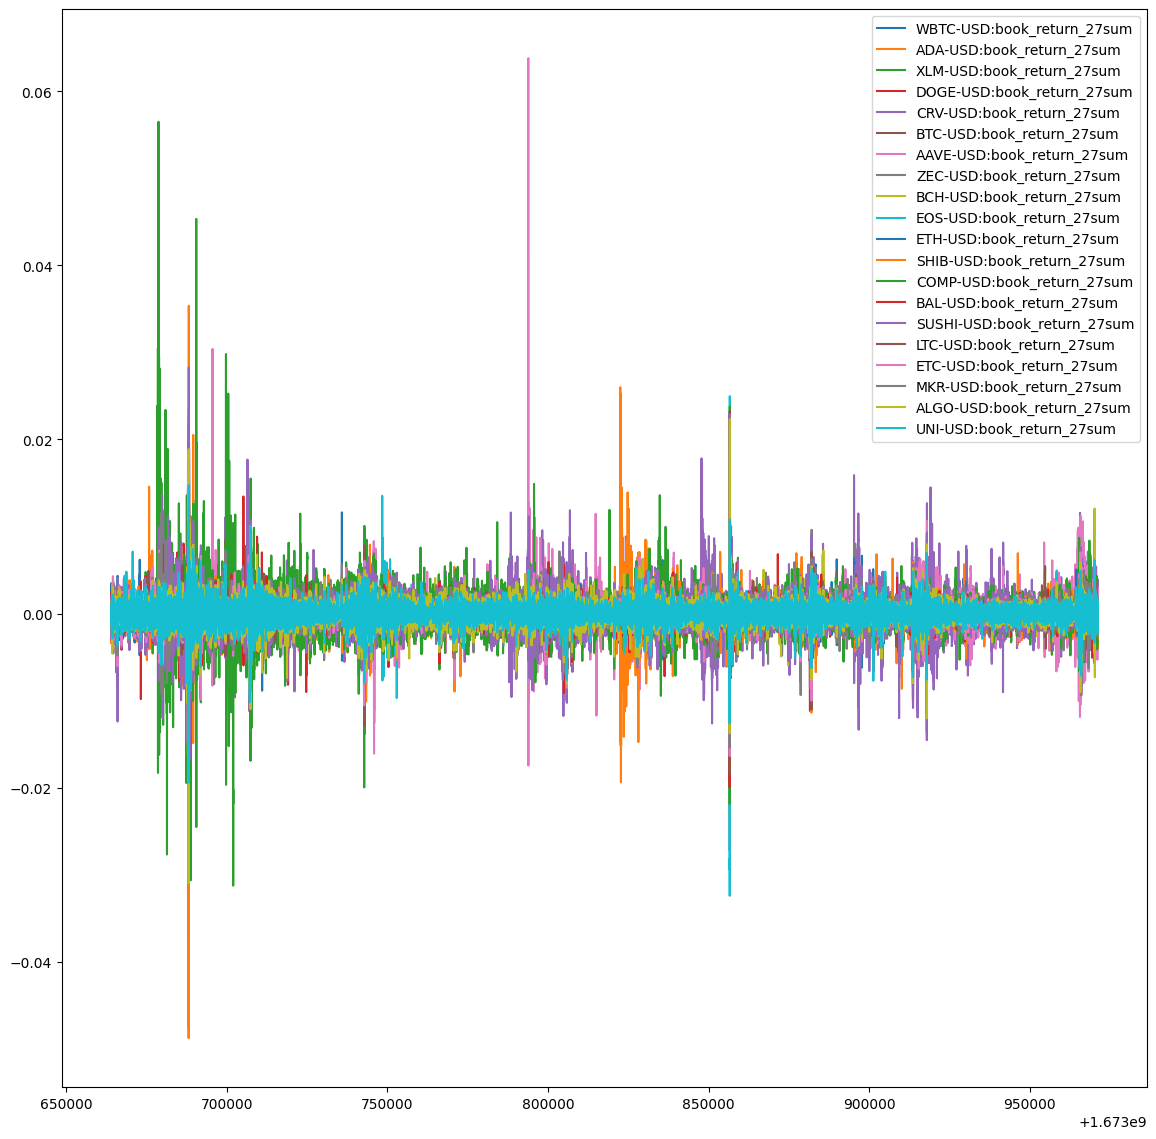

In [22]:
f,ax=plt.subplots(figsize=(14,14))
book_returns.plot(ax=ax)

In [ ]:
### Crypto Trade Return

In [31]:
trcols162 = [col for col in columns if 'trade_return_162sum' in col]
trcols162

['WBTC-USD:trade_return_162sum',
 'ADA-USD:trade_return_162sum',
 'XLM-USD:trade_return_162sum',
 'DOGE-USD:trade_return_162sum',
 'CRV-USD:trade_return_162sum',
 'BTC-USD:trade_return_162sum',
 'AAVE-USD:trade_return_162sum',
 'ZEC-USD:trade_return_162sum',
 'BCH-USD:trade_return_162sum',
 'EOS-USD:trade_return_162sum',
 'ETH-USD:trade_return_162sum',
 'SHIB-USD:trade_return_162sum',
 'COMP-USD:trade_return_162sum',
 'BAL-USD:trade_return_162sum',
 'SUSHI-USD:trade_return_162sum',
 'LTC-USD:trade_return_162sum',
 'ETC-USD:trade_return_162sum',
 'MKR-USD:trade_return_162sum',
 'ALGO-USD:trade_return_162sum',
 'UNI-USD:trade_return_162sum']

In [32]:
trade_returns = data[trcols162]

In [33]:
trade_returns.isna().sum().sum()

0

In [34]:
corr = trade_returns.corr()
corr

,WBTC-USD:trade_return_162sum,ADA-USD:trade_return_162sum,XLM-USD:trade_return_162sum,DOGE-USD:trade_return_162sum,CRV-USD:trade_return_162sum,BTC-USD:trade_return_162sum,AAVE-USD:trade_return_162sum,ZEC-USD:trade_return_162sum,BCH-USD:trade_return_162sum,EOS-USD:trade_return_162sum,ETH-USD:trade_return_162sum,SHIB-USD:trade_return_162sum,COMP-USD:trade_return_162sum,BAL-USD:trade_return_162sum,SUSHI-USD:trade_return_162sum,LTC-USD:trade_return_162sum,ETC-USD:trade_return_162sum,MKR-USD:trade_return_162sum,ALGO-USD:trade_return_162sum,UNI-USD:trade_return_162sum
WBTC-USD:trade_return_162sum,1.000000,0.338321,0.318314,0.348289,0.283432,0.458410,0.227579,0.377785,0.370396,0.357759,0.428216,0.298005,0.188054,0.308356,0.317036,0.324982,0.374981,0.379057,0.313621,0.357328
ADA-USD:trade_return_162sum,0.338321,1.000000,0.776673,0.855101,0.577219,0.752381,0.587939,0.749080,0.763361,0.737184,0.746297,0.685764,0.390549,0.477554,0.615801,0.740569,0.760029,0.686397,0.804290,0.758125
XLM-USD:trade_return_162sum,0.318314,0.776673,1.000000,0.782738,0.553596,0.700897,0.553038,0.729337,0.720496,0.706882,0.689536,0.630412,0.371494,0.492548,0.596946,0.679420,0.706470,0.671292,0.758185,0.731082
DOGE-USD:trade_return_162sum,0.348289,0.855101,0.782738,1.000000,0.598094,0.772411,0.590291,0.762095,0.776516,0.743041,0.789789,0.758831,0.382551,0.474577,0.635664,0.759058,0.780431,0.708079,0.810738,0.767180
CRV-USD:trade_return_162sum,0.283432,0.577219,0.553596,0.598094,1.000000,0.524275,0.477317,0.577150,0.570439,0.522972,0.560230,0.500585,0.287521,0.363185,0.501211,0.494544,0.566661,0.573858,0.571407,0.593469
BTC-USD:trade_return_162sum,0.458410,0.752381,0.700897,0.772411,0.524275,1.000000,0.502032,0.661536,0.665702,0.655108,0.881208,0.587352,0.354273,0.470102,0.532644,0.705903,0.676476,0.614395,0.704043,0.685507
AAVE-USD:trade_return_162sum,0.227579,0.587939,0.553038,0.590291,0.477317,0.502032,1.000000,0.563947,0.568309,0.533766,0.541180,0.486463,0.340604,0.355642,0.493212,0.521528,0.542081,0.567828,0.586868,0.607859
ZEC-USD:trade_return_162sum,0.377785,0.749080,0.729337,0.762095,0.577150,0.661536,0.563947,1.000000,0.756698,0.705462,0.680442,0.617278,0.398201,0.497547,0.635321,0.675214,0.727869,0.711354,0.737707,0.733719
BCH-USD:trade_return_162sum,0.370396,0.763361,0.720496,0.776516,0.570439,0.665702,0.568309,0.756698,1.000000,0.730401,0.691216,0.636122,0.387657,0.482307,0.617612,0.699570,0.742624,0.694502,0.733210,0.737706
EOS-USD:trade_return_162sum,0.357759,0.737184,0.706882,0.743041,0.522972,0.655108,0.533766,0.705462,0.730401,1.000000,0.667074,0.598609,0.368922,0.493667,0.597528,0.663462,0.703391,0.656854,0.710267,0.684720


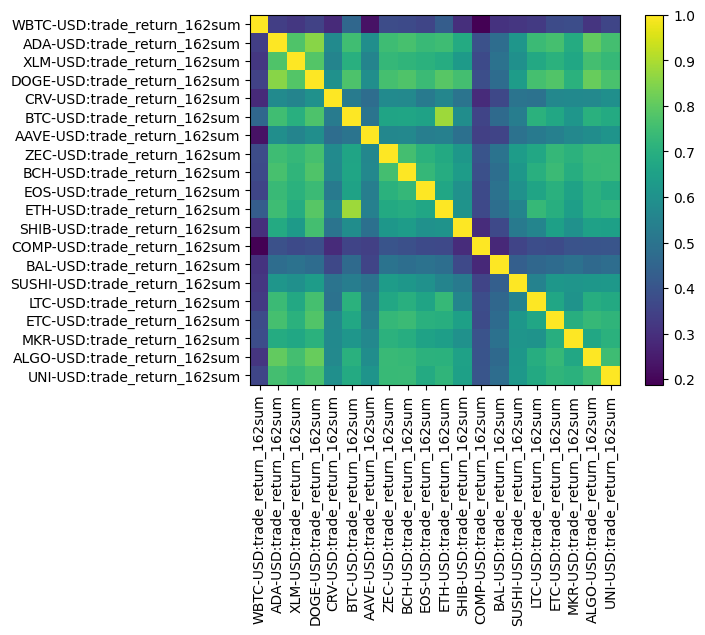

In [35]:
plt.imshow(corr)
plt.yticks(range(len(trade_returns.columns)), trade_returns.columns)
plt.xticks(range(len(trade_returns.columns)), trade_returns.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

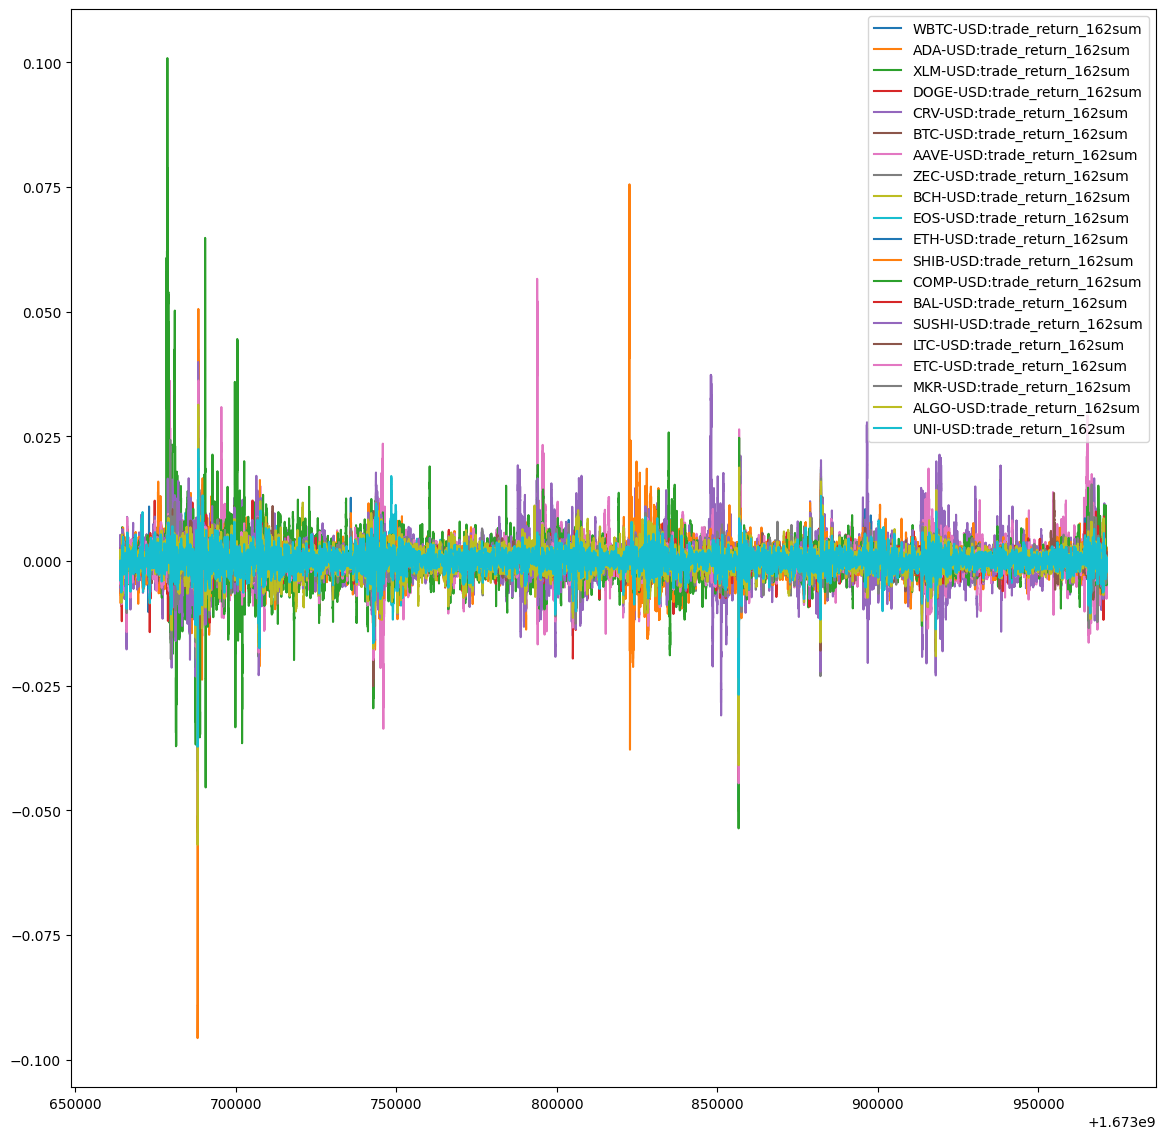

In [36]:
f,ax=plt.subplots(figsize=(14,14))
trade_returns.plot(ax=ax)

In [37]:
trcols960 = [col for col in columns if 'trade_return_960sum' in col]
trcols960

['WBTC-USD:trade_return_960sum',
 'ADA-USD:trade_return_960sum',
 'XLM-USD:trade_return_960sum',
 'DOGE-USD:trade_return_960sum',
 'CRV-USD:trade_return_960sum',
 'BTC-USD:trade_return_960sum',
 'AAVE-USD:trade_return_960sum',
 'ZEC-USD:trade_return_960sum',
 'BCH-USD:trade_return_960sum',
 'EOS-USD:trade_return_960sum',
 'ETH-USD:trade_return_960sum',
 'SHIB-USD:trade_return_960sum',
 'COMP-USD:trade_return_960sum',
 'BAL-USD:trade_return_960sum',
 'SUSHI-USD:trade_return_960sum',
 'LTC-USD:trade_return_960sum',
 'ETC-USD:trade_return_960sum',
 'MKR-USD:trade_return_960sum',
 'ALGO-USD:trade_return_960sum',
 'UNI-USD:trade_return_960sum']

In [38]:
trade_returns = data[trcols960]

In [39]:
trade_returns.isna().sum().sum()

0

In [40]:
corr = trade_returns.corr()
corr

,WBTC-USD:trade_return_960sum,ADA-USD:trade_return_960sum,XLM-USD:trade_return_960sum,DOGE-USD:trade_return_960sum,CRV-USD:trade_return_960sum,BTC-USD:trade_return_960sum,AAVE-USD:trade_return_960sum,ZEC-USD:trade_return_960sum,BCH-USD:trade_return_960sum,EOS-USD:trade_return_960sum,ETH-USD:trade_return_960sum,SHIB-USD:trade_return_960sum,COMP-USD:trade_return_960sum,BAL-USD:trade_return_960sum,SUSHI-USD:trade_return_960sum,LTC-USD:trade_return_960sum,ETC-USD:trade_return_960sum,MKR-USD:trade_return_960sum,ALGO-USD:trade_return_960sum,UNI-USD:trade_return_960sum
WBTC-USD:trade_return_960sum,1.000000,0.643387,0.585344,0.659384,0.483585,0.821041,0.449807,0.639652,0.637348,0.619077,0.761993,0.549477,0.247431,0.589365,0.511882,0.567275,0.658147,0.608906,0.563325,0.609987
ADA-USD:trade_return_960sum,0.643387,1.000000,0.848097,0.885348,0.624182,0.788481,0.618700,0.853854,0.858843,0.813252,0.776873,0.750317,0.378672,0.702267,0.735859,0.764182,0.853531,0.807011,0.840938,0.812794
XLM-USD:trade_return_960sum,0.585344,0.848097,1.000000,0.839494,0.612186,0.743443,0.559571,0.828000,0.814269,0.794823,0.723331,0.714859,0.335205,0.698049,0.691582,0.733329,0.811001,0.775623,0.827316,0.781251
DOGE-USD:trade_return_960sum,0.659384,0.885348,0.839494,1.000000,0.649812,0.805793,0.594199,0.853452,0.859346,0.810168,0.823913,0.816530,0.353785,0.724861,0.724259,0.790429,0.867990,0.797167,0.836079,0.812325
CRV-USD:trade_return_960sum,0.483585,0.624182,0.612186,0.649812,1.000000,0.574136,0.531964,0.638077,0.607218,0.573202,0.587545,0.556289,0.260258,0.557140,0.579978,0.527054,0.624891,0.636651,0.594848,0.618090
BTC-USD:trade_return_960sum,0.821041,0.788481,0.743443,0.805793,0.574136,1.000000,0.517983,0.763727,0.748775,0.735739,0.905476,0.666889,0.298529,0.673202,0.615077,0.699563,0.773896,0.730456,0.701545,0.743056
AAVE-USD:trade_return_960sum,0.449807,0.618700,0.559571,0.594199,0.531964,0.517983,1.000000,0.598662,0.601826,0.582817,0.560637,0.498007,0.431621,0.501087,0.554172,0.538118,0.595439,0.620277,0.593097,0.619891
ZEC-USD:trade_return_960sum,0.639652,0.853854,0.828000,0.853452,0.638077,0.763727,0.598662,1.000000,0.848125,0.800998,0.765809,0.723954,0.404685,0.730269,0.733549,0.764842,0.839217,0.817333,0.813696,0.810759
BCH-USD:trade_return_960sum,0.637348,0.858843,0.814269,0.859346,0.607218,0.748775,0.601826,0.848125,1.000000,0.815648,0.759342,0.717238,0.387281,0.713489,0.704015,0.758186,0.847161,0.786882,0.809182,0.805753
EOS-USD:trade_return_960sum,0.619077,0.813252,0.794823,0.810168,0.573202,0.735739,0.582817,0.800998,0.815648,1.000000,0.733450,0.667245,0.320505,0.676205,0.674219,0.712213,0.797157,0.753780,0.784901,0.764466


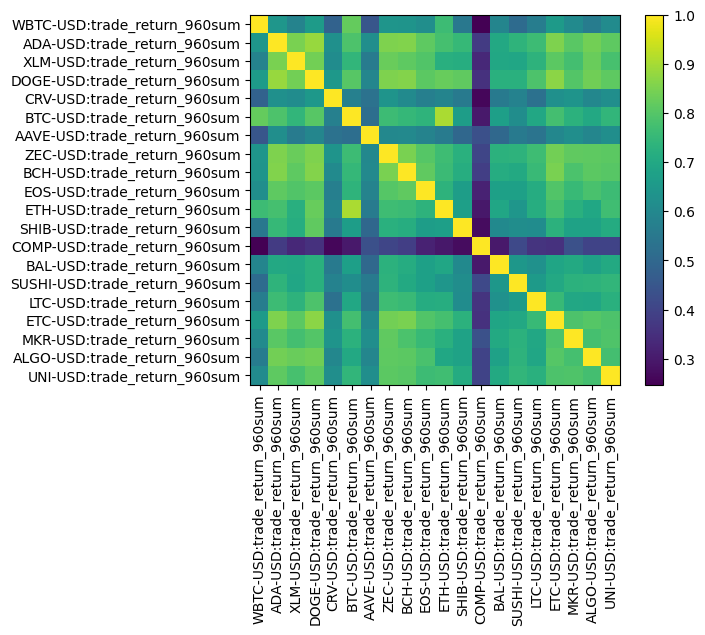

In [41]:
plt.imshow(corr)
plt.yticks(range(len(trade_returns.columns)), trade_returns.columns)
plt.xticks(range(len(trade_returns.columns)), trade_returns.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

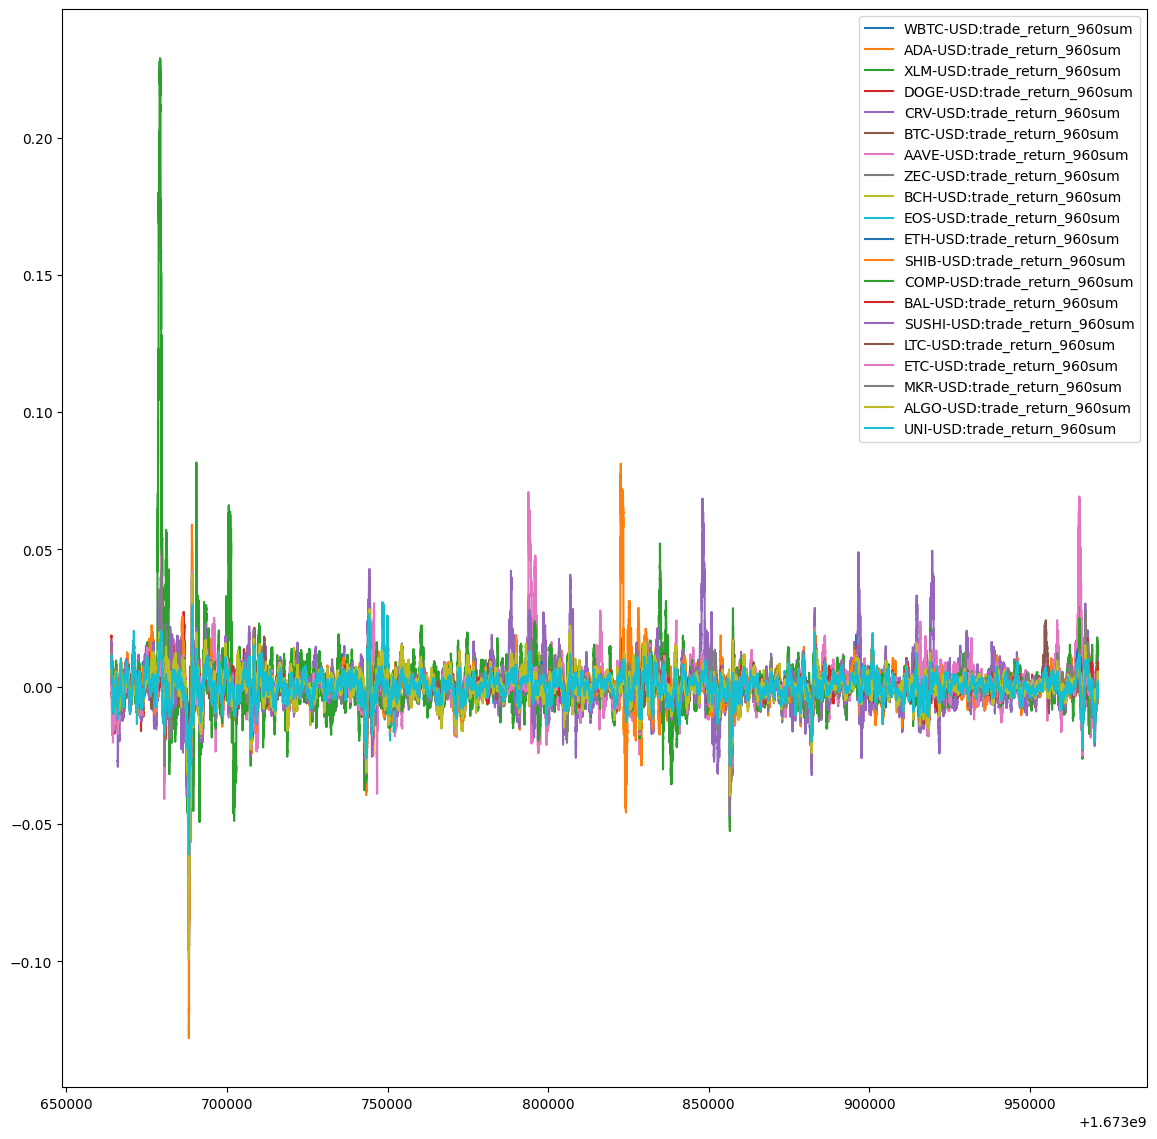

In [42]:
f,ax=plt.subplots(figsize=(14,14))
trade_returns.plot(ax=ax)

In [ ]:
### Crypto Volatility Correlation

In [44]:
bvcols27 = [col for col in columns if 'book_volatility_27' in col]
bvcols27

['WBTC-USD:book_volatility_27',
 'ADA-USD:book_volatility_27',
 'XLM-USD:book_volatility_27',
 'DOGE-USD:book_volatility_27',
 'CRV-USD:book_volatility_27',
 'BTC-USD:book_volatility_27',
 'AAVE-USD:book_volatility_27',
 'ZEC-USD:book_volatility_27',
 'BCH-USD:book_volatility_27',
 'EOS-USD:book_volatility_27',
 'ETH-USD:book_volatility_27',
 'SHIB-USD:book_volatility_27',
 'COMP-USD:book_volatility_27',
 'BAL-USD:book_volatility_27',
 'SUSHI-USD:book_volatility_27',
 'LTC-USD:book_volatility_27',
 'ETC-USD:book_volatility_27',
 'MKR-USD:book_volatility_27',
 'ALGO-USD:book_volatility_27',
 'UNI-USD:book_volatility_27']

In [45]:
book_volatility = data[bvcols27]

In [46]:
book_volatility.isna().sum().sum()

0

In [47]:
book_volatility.describe()

,WBTC-USD:book_volatility_27,ADA-USD:book_volatility_27,XLM-USD:book_volatility_27,DOGE-USD:book_volatility_27,CRV-USD:book_volatility_27,BTC-USD:book_volatility_27,AAVE-USD:book_volatility_27,ZEC-USD:book_volatility_27,BCH-USD:book_volatility_27,EOS-USD:book_volatility_27,ETH-USD:book_volatility_27,SHIB-USD:book_volatility_27,COMP-USD:book_volatility_27,BAL-USD:book_volatility_27,SUSHI-USD:book_volatility_27,LTC-USD:book_volatility_27,ETC-USD:book_volatility_27,MKR-USD:book_volatility_27,ALGO-USD:book_volatility_27,UNI-USD:book_volatility_27
count,307094.000000,3.070940e+05,3.070940e+05,3.070940e+05,307094.000000,307094.000000,307094.000000,307094.000000,307094.000000,307094.000000,307094.000000,3.070940e+05,307094.000000,307094.000000,307094.000000,3.070940e+05,307094.000000,307094.000000,3.070940e+05,307094.000000
mean,0.001190,6.304249e-04,6.456813e-04,7.318243e-04,0.001176,0.000427,0.001039,0.000926,0.000684,0.000693,0.000453,8.374376e-04,0.001569,0.000872,0.001325,6.132514e-04,0.000829,0.000911,8.306032e-04,0.000729
std,0.000952,4.890396e-04,4.012997e-04,5.262134e-04,0.000934,0.000327,0.000926,0.000650,0.000473,0.000588,0.000346,8.012357e-04,0.001437,0.000809,0.001027,4.368214e-04,0.000571,0.000593,5.632947e-04,0.000467
min,0.000000,1.855502e-07,3.134006e-07,1.841727e-07,0.000000,0.000026,0.000000,0.000000,0.000000,0.000000,0.000021,4.893451e-08,0.000000,0.000000,0.000000,2.914457e-12,0.000000,0.000000,2.305939e-09,0.000000
25%,0.000628,3.631881e-04,3.901291e-04,4.399536e-04,0.000593,0.000248,0.000572,0.000553,0.000415,0.000333,0.000263,3.468425e-04,0.000829,0.000300,0.000740,3.646807e-04,0.000517,0.000547,5.060449e-04,0.000456
50%,0.000986,5.282045e-04,5.757546e-04,6.124981e-04,0.000986,0.000339,0.000832,0.000795,0.000584,0.000577,0.000366,6.657394e-04,0.001252,0.000737,0.001121,5.166838e-04,0.000731,0.000804,7.150335e-04,0.000632
75%,0.001473,7.619058e-04,8.072538e-04,8.688932e-04,0.001477,0.000491,0.001224,0.001122,0.000815,0.000880,0.000524,1.072515e-03,0.001872,0.001227,0.001632,7.386218e-04,0.001003,0.001134,1.003169e-03,0.000871
max,0.012090,1.208064e-02,6.939044e-03,1.223153e-02,0.013556,0.006256,0.046141,0.014259,0.008322,0.010331,0.007535,1.341066e-02,0.044975,0.012106,0.020974,8.960352e-03,0.017348,0.009910,8.313151e-03,0.010042


In [48]:
corr = book_volatility.corr()
corr

,WBTC-USD:book_volatility_27,ADA-USD:book_volatility_27,XLM-USD:book_volatility_27,DOGE-USD:book_volatility_27,CRV-USD:book_volatility_27,BTC-USD:book_volatility_27,AAVE-USD:book_volatility_27,ZEC-USD:book_volatility_27,BCH-USD:book_volatility_27,EOS-USD:book_volatility_27,ETH-USD:book_volatility_27,SHIB-USD:book_volatility_27,COMP-USD:book_volatility_27,BAL-USD:book_volatility_27,SUSHI-USD:book_volatility_27,LTC-USD:book_volatility_27,ETC-USD:book_volatility_27,MKR-USD:book_volatility_27,ALGO-USD:book_volatility_27,UNI-USD:book_volatility_27
WBTC-USD:book_volatility_27,1.000000,0.549763,0.522441,0.539596,0.451935,0.707031,0.401766,0.506226,0.534486,0.531996,0.678459,0.447918,0.245506,0.463872,0.466663,0.568298,0.523518,0.486677,0.523039,0.537916
ADA-USD:book_volatility_27,0.549763,1.000000,0.739241,0.799855,0.618657,0.701535,0.547472,0.751104,0.770822,0.728441,0.692353,0.651332,0.487064,0.622225,0.693718,0.770460,0.787147,0.693726,0.778920,0.754327
XLM-USD:book_volatility_27,0.522441,0.739241,1.000000,0.716160,0.572600,0.676146,0.484596,0.696261,0.700091,0.677012,0.659734,0.597551,0.425160,0.572742,0.601589,0.701632,0.694340,0.657187,0.718583,0.703819
DOGE-USD:book_volatility_27,0.539596,0.799855,0.716160,1.000000,0.594541,0.721018,0.519932,0.735347,0.741304,0.715225,0.710950,0.703722,0.467773,0.606621,0.676216,0.768410,0.782003,0.698629,0.751589,0.734544
CRV-USD:book_volatility_27,0.451935,0.618657,0.572600,0.594541,1.000000,0.552948,0.462744,0.572133,0.596486,0.575349,0.568153,0.497202,0.316781,0.498624,0.540065,0.578753,0.609280,0.538837,0.601626,0.605928
BTC-USD:book_volatility_27,0.707031,0.701535,0.676146,0.721018,0.552948,1.000000,0.478086,0.644625,0.675892,0.673623,0.869318,0.555894,0.355035,0.558248,0.574892,0.736083,0.679991,0.622416,0.674879,0.684399
AAVE-USD:book_volatility_27,0.401766,0.547472,0.484596,0.519932,0.462744,0.478086,1.000000,0.514824,0.516269,0.517535,0.486042,0.421693,0.377799,0.440000,0.496809,0.526269,0.524585,0.505519,0.536773,0.550666
ZEC-USD:book_volatility_27,0.506226,0.751104,0.696261,0.735347,0.572133,0.644625,0.514824,1.000000,0.728262,0.706663,0.642116,0.607199,0.443210,0.589981,0.639504,0.720300,0.713052,0.673541,0.748221,0.710505
BCH-USD:book_volatility_27,0.534486,0.770822,0.700091,0.741304,0.596486,0.675892,0.516269,0.728262,1.000000,0.720856,0.676678,0.592729,0.444493,0.599776,0.650297,0.740922,0.739684,0.672557,0.730866,0.715714
EOS-USD:book_volatility_27,0.531996,0.728441,0.677012,0.715225,0.575349,0.673623,0.517535,0.706663,0.720856,1.000000,0.674328,0.587565,0.411849,0.573401,0.627342,0.706935,0.709839,0.654741,0.719042,0.694649


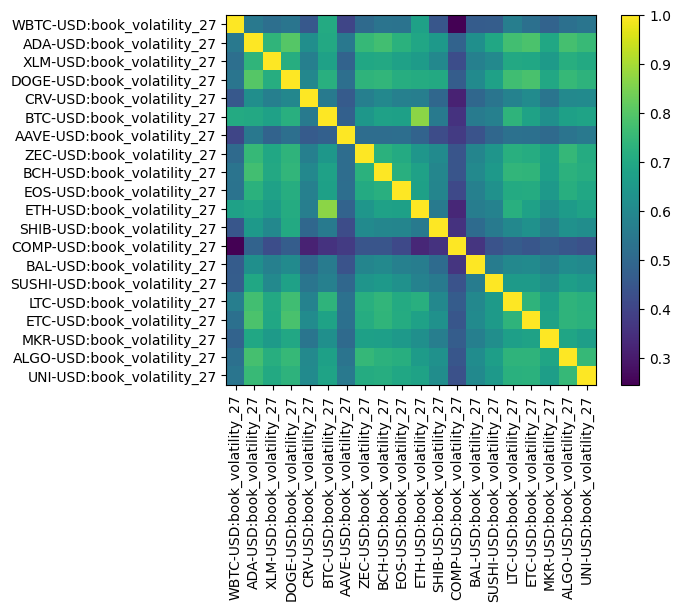

In [50]:
plt.imshow(corr)
plt.yticks(range(len(book_volatility.columns)), book_volatility.columns)
plt.xticks(range(len(book_volatility.columns)), book_volatility.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

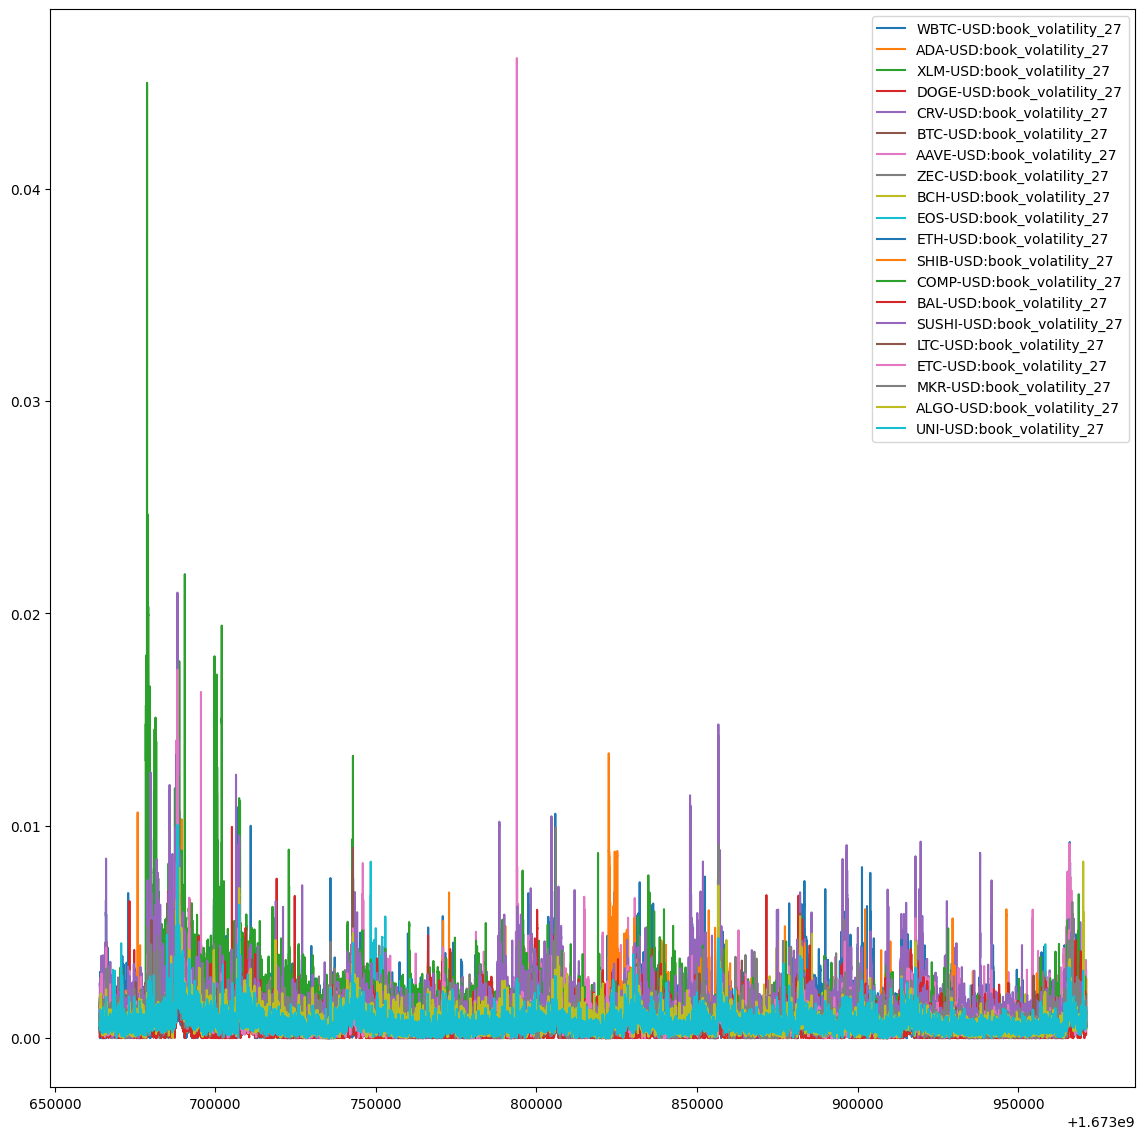

In [51]:
f,ax=plt.subplots(figsize=(14,14))
book_volatility.plot(ax=ax)

In [ ]:
### Crypto Trade Volume

In [25]:
tvcols162 = [col for col in columns if 'trade_volume_162sum' in col]
tvcols162

['WBTC-USD:trade_volume_162sum',
 'ADA-USD:trade_volume_162sum',
 'XLM-USD:trade_volume_162sum',
 'DOGE-USD:trade_volume_162sum',
 'CRV-USD:trade_volume_162sum',
 'BTC-USD:trade_volume_162sum',
 'AAVE-USD:trade_volume_162sum',
 'ZEC-USD:trade_volume_162sum',
 'BCH-USD:trade_volume_162sum',
 'EOS-USD:trade_volume_162sum',
 'ETH-USD:trade_volume_162sum',
 'SHIB-USD:trade_volume_162sum',
 'COMP-USD:trade_volume_162sum',
 'BAL-USD:trade_volume_162sum',
 'SUSHI-USD:trade_volume_162sum',
 'LTC-USD:trade_volume_162sum',
 'ETC-USD:trade_volume_162sum',
 'MKR-USD:trade_volume_162sum',
 'ALGO-USD:trade_volume_162sum',
 'UNI-USD:trade_volume_162sum']

In [26]:
trade_volumes = data[tvcols162]

In [27]:
trade_volumes.isna().sum().sum()

0

In [28]:
trade_volumes.describe()

,WBTC-USD:trade_volume_162sum,ADA-USD:trade_volume_162sum,XLM-USD:trade_volume_162sum,DOGE-USD:trade_volume_162sum,CRV-USD:trade_volume_162sum,BTC-USD:trade_volume_162sum,AAVE-USD:trade_volume_162sum,ZEC-USD:trade_volume_162sum,BCH-USD:trade_volume_162sum,EOS-USD:trade_volume_162sum,ETH-USD:trade_volume_162sum,SHIB-USD:trade_volume_162sum,COMP-USD:trade_volume_162sum,BAL-USD:trade_volume_162sum,SUSHI-USD:trade_volume_162sum,LTC-USD:trade_volume_162sum,ETC-USD:trade_volume_162sum,MKR-USD:trade_volume_162sum,ALGO-USD:trade_volume_162sum,UNI-USD:trade_volume_162sum
count,307094.000000,307094.000000,307094.000000,307094.000000,307094.000000,3.070940e+05,307094.000000,307094.000000,307094.000000,307094.000000,3.070940e+05,3.070940e+05,307094.000000,307094.000000,307094.000000,307094.000000,307094.000000,307094.000000,307094.000000,307094.000000
mean,162.459167,33971.464844,8692.563477,56162.503906,10332.258789,1.000783e+06,22386.796875,4698.210449,7589.040039,3323.091553,6.163171e+05,4.405743e+04,3191.370850,257.414062,2667.694336,35168.921875,4201.039062,3180.501953,15105.270508,10123.132812
std,1474.438110,35534.683594,10056.704102,55880.871094,19048.542969,6.630508e+05,28938.406250,5379.848145,9642.797852,4561.104492,4.819138e+05,6.224854e+04,6998.151855,1807.377563,6802.038086,44846.664062,12926.087891,4867.753418,18110.027344,18062.812500
min,0.000000,9.507477,0.000000,130.891342,0.000000,1.560173e+04,0.000000,0.000000,0.000000,0.000000,3.346366e+04,0.000000e+00,0.000000,0.000000,0.000000,561.111633,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11898.045898,3767.156250,22769.021484,2534.002441,5.462325e+05,7136.520020,707.665527,2204.980957,1002.808533,3.434150e+05,1.271078e+04,218.538193,0.000000,258.270874,12306.533203,404.107391,1028.721924,5385.715332,4232.183594
50%,0.000000,23639.210938,6065.797852,40146.285156,5219.182129,8.411528e+05,13553.063965,4338.238770,4565.403809,2142.097168,4.998964e+05,2.536960e+04,1054.958252,2.727690,907.431152,22910.458984,1442.708618,2153.222168,9868.602051,6801.039551
75%,10.502879,43924.707031,9953.045898,70673.828125,10580.017578,1.276285e+06,25955.921875,6493.395020,8950.194580,4079.242432,7.270095e+05,5.042449e+04,3140.493652,41.524799,2446.377930,41220.640625,4212.013184,3907.651367,18091.349121,10556.883789
max,43746.261719,518487.468750,168896.421875,800403.125000,375965.250000,7.855406e+06,420165.500000,120445.500000,118691.546875,79429.796875,8.325656e+06,1.178131e+06,109666.078125,50781.359375,161781.062500,751195.562500,427904.093750,133325.390625,349786.156250,496214.906250
